# Loading Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Mark.txt',header=None)

In [2]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
columns = ['Nilai_Ujian1','Nilai_Ujian2','Lulus']
data.columns = columns

In [4]:
data.head()

,Nilai_Ujian1,Nilai_Ujian2,Lulus
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Data Visualization

<Axes: xlabel='Nilai_Ujian1', ylabel='Nilai_Ujian2'>

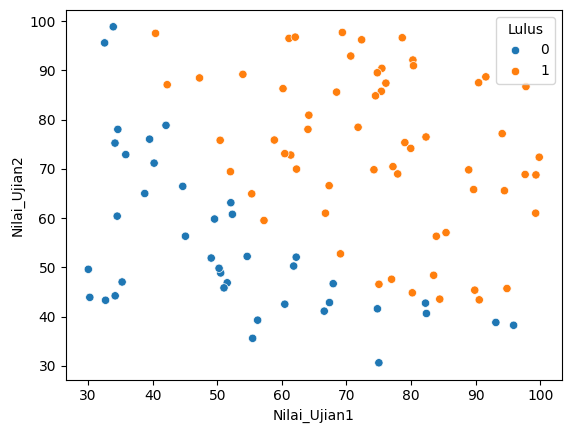

In [5]:
import seaborn as sns

sns.scatterplot(data=data,x='Nilai_Ujian1',y='Nilai_Ujian2',hue='Lulus')

<Axes: >

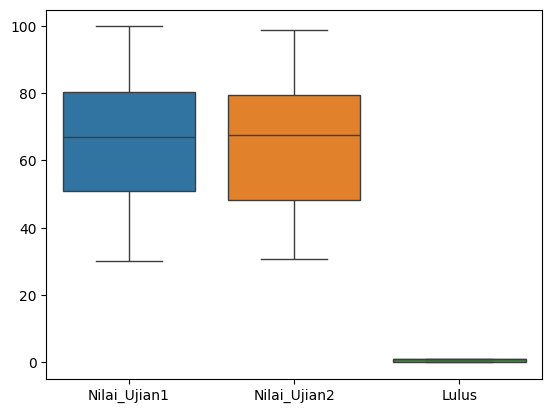

In [6]:
sns.boxplot(data=data)

# Preprocessing

Check Missing Value

In [7]:
data.isnull().sum()

Nilai_Ujian1    0
Nilai_Ujian2    0
Lulus           0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
data['Nilai_Ujian1'] = Scaler.fit_transform(data)


In [9]:
data.head()

,Nilai_Ujian1,Nilai_Ujian2,Lulus
0,0.065428,78.024693,0
1,0.003266,43.894998,0
2,0.082968,72.902198,0
3,0.431764,86.308552,1
4,0.701943,75.344376,1


# Modeling

Naive Bayes sama Logistic Regression

Splitting Dataset

In [10]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=['Lulus'])
y = data['Lulus']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

LR_predict = LR.predict(x_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)

NB_predict = NB.predict(x_test)

# Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Logistic Regression")
print(classification_report(y_test,LR_predict))

Logistic Regression
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.86      0.92        21

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.93      0.90      0.90        30



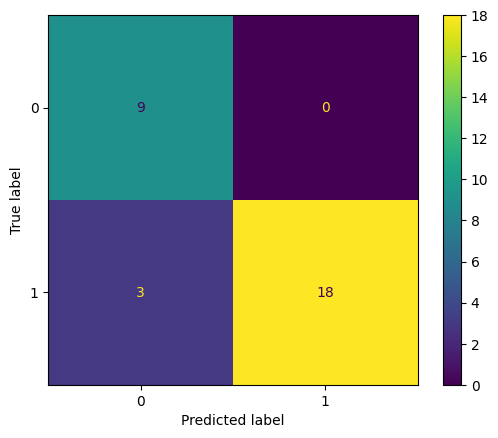

In [14]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,LR_predict),display_labels=LR.classes_)
display.plot()

In [15]:
print("Naive Bayes")
print(classification_report(y_test,NB_predict))

Naive Bayes
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.94      0.76      0.84        21

    accuracy                           0.80        30
   macro avg       0.78      0.83      0.78        30
weighted avg       0.84      0.80      0.81        30



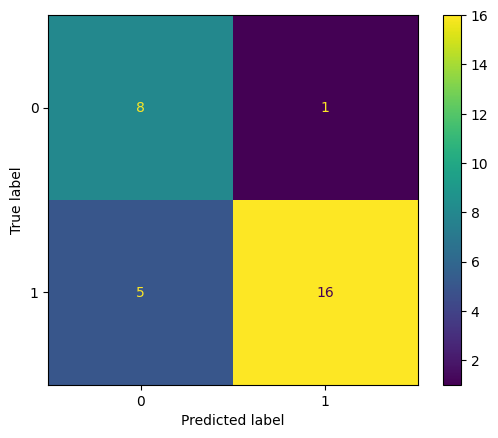

In [16]:
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,NB_predict),display_labels=NB.classes_)
display2.plot()